In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np

In [5]:
# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [6]:
# Step 2: Handle missing values (if any)
if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(), inplace=True)  # Fill missing values with the mean
    print("Missing values handled.")

In [7]:
# Step 3: Normalize numerical features
scaler = StandardScaler()
feature_columns = df.columns[:-1]  # Exclude the target column
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [8]:
# Step 4: Split the dataset into features and target
X = df.drop(columns='target')  # Features
y = df['target']  # Target

In [9]:
# Step 5: Perform feature selection
# Select the top 10 features using ANOVA F-test
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

In [10]:
# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Selected {k} Features: {list(selected_features)}")

Selected 10 Features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


In [11]:
# Step 6: Split the selected features into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [12]:
# Step 7: Define the MLPClassifier and parameter grid
mlp = MLPClassifier(random_state=42, max_iter=500)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimization algorithms
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
}

In [13]:
# Step 8: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available processors
)

In [14]:
# Step 9: Perform the Grid Search
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)
print("Grid Search completed.")

Starting Grid Search...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Grid Search completed.


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
# Step 10: Display the best parameters and evaluate the model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [16]:
# Evaluate on the test set
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Key Metrics:

Precision:

Class 0 (negative cases): 95% of the predicted negatives are correct.
Class 1 (positive cases): 99% of the predicted positives are correct.

High precision indicates the model is making very few false-positive predictions.

Recall:

Class 0: 98% of the actual negatives are correctly identified.
Class 1: 97% of the actual positives are correctly identified.

High recall shows the model is missing very few actual positives or negatives.

F1-Score:

Combines precision and recall into a single score:

Class 0: 97%
Class 1: 98%

Indicates a good balance between precision and recall.

Accuracy:

Overall, the model correctly classified 97% of the samples.

Macro Average:

Average of precision, recall, and F1-score across all classes: 97%.

Treats all classes equally.

Strong Performance:

The model performs exceptionally well, with high precision and recall across both classes.
Accuracy is 97%, indicating excellent predictive performance on this dataset.

Step 5: Implementing an Artificial Neural Network (ANN) Model

In [17]:
# Step 1: Load and preprocess the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [18]:
# Normalize features
scaler = StandardScaler()
feature_columns = df.columns[:-1]
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [19]:
# Perform feature selection (optional)
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(df[feature_columns], df['target'])
selected_features = df[feature_columns].columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}")

Selected Features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


In [20]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, df['target'], test_size=0.2, random_state=42)

In [21]:
# Step 2: Define the ANN model
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',          # ReLU activation function
    solver='adam',              # Adam optimizer
    max_iter=500,               # Maximum number of iterations
    random_state=42
)

In [22]:
# Step 3: Train the model
print("Training the ANN model...")
mlp.fit(X_train, y_train)
print("Training completed.")

Training the ANN model...
Training completed.


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
# Step 4: Evaluate the model
y_pred = mlp.predict(X_test)

In [24]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



ccuracy:

97% Accuracy: The model correctly predicted 97% of the test samples, indicating strong overall performance. This suggests the ANN effectively captured the patterns in the dataset.

Class-Specific Metrics:

Class 0 (Benign):

Precision (95%): Of all predicted benign cases, 95% were correct. A slightly lower precision compared to Class 1 means there are more false positives for Class 0.

Recall (98%): Of all actual benign cases, 98% were correctly identified. This shows the model misses very few actual benign cases.

F1-Score (97%): Combines precision and recall; high performance on this class.

Class 1 (Malignant):

Precision (99%): The model is extremely reliable when predicting malignant cases, with very few false positives.

Recall (97%): Of all actual malignant cases, 97% were correctly identified. There is a slightly higher rate of false negatives compared to false positives.

F1-Score (98%): Indicates a strong balance between precision and recall.

Macro vs. Weighted Averages:

Macro Average (97%):

This treats both classes equally, regardless of class size. The high score indicates balanced performance across classes.

The high accuracy and balanced metrics across classes indicate the ANN model generalizes well on the dataset.


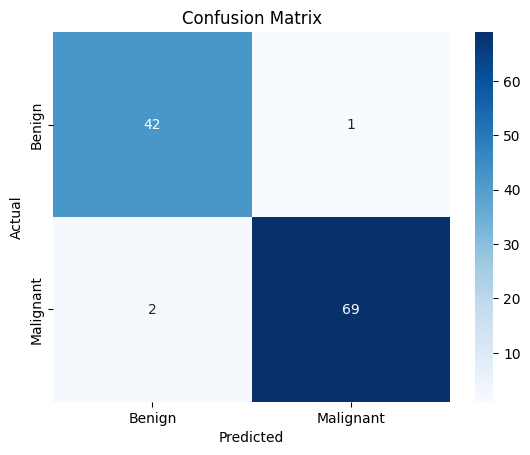

In [25]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
# Check model performance on training data
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.97
Test Accuracy: 0.97


The training and test accuracies being identical at 97% indicate that the model is well-trained and generalizes effectively to unseen data. There is no sign of overfitting or underfitting, suggesting a good balance between model complexity and dataset representation.

Step 6: Streamlit App Development

In [27]:
# Define the Streamlit app code as a string
app_code = """
import streamlit as st
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import numpy as np

# Load and preprocess the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[data.feature_names])
y = df['target']

# Train a simple ANN model
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42)
mlp.fit(X, y)

# Streamlit App
st.title("Breast Cancer Prediction App")
st.write(''' 
### Explore the Breast Cancer Dataset and Predict Cancer Type
''')

# Dataset exploration
if st.sidebar.checkbox("Show Dataset"):
    st.write(df.head())

# User Input Section
st.sidebar.write("### Enter Features for Prediction")
user_input = []
for feature in data.feature_names:
    value = st.sidebar.number_input(feature, min_value=float(np.min(df[feature])), max_value=float(np.max(df[feature])), value=float(df[feature].mean()))
    user_input.append(value)

# Prediction Button
if st.sidebar.button("Predict"):
    # Scale user input and make a prediction
    user_input_scaled = scaler.transform([user_input])
    prediction = mlp.predict(user_input_scaled)
    prediction_proba = mlp.predict_proba(user_input_scaled)
    
    result = "Malignant" if prediction[0] == 1 else "Benign"
    st.write(f"### Prediction: {result}")
    st.write(f"Probability of Malignant: {prediction_proba[0][1]:.2f}")
    st.write(f"Probability of Benign: {prediction_proba[0][0]:.2f}")

# Visualization Section
st.sidebar.write("### Dataset Visualization")
if st.sidebar.checkbox("Show Target Distribution"):
    st.write("Target Distribution in Dataset")
    st.bar_chart(df['target'].value_counts())
"""

In [28]:
file_path = "app.py"
with open(file_path, "w") as file:
    file.write(app_code)

print(f"Streamlit app saved as {file_path}")

Streamlit app saved as app.py


Running the Streamlit App:

Run the following command in the terminal to launch the app locally:

Select firs the dir where this file is saved

streamlit run app.py